# Problem 5 - Data Analysis using Titanic Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [ ]:
##load the dataset from gdrive
df = pd.read_csv("drive/MyDrive/msda/titanic.csv")

In [ ]:
##check for the successfull data load
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(891, 12)

# 1. Bar Charts

### a. Bar chart to visualize the distribution of passengers by Sex


male      577
female    314
Name: Sex, dtype: int64


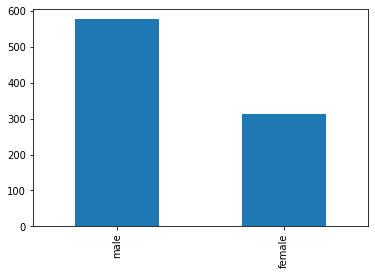

In [ ]:
ax = df['Sex'].value_counts().plot(kind ="bar")
print(df['Sex'].value_counts())

**Interpretation - The bar chart shows that there were more number of male passengers than female by 263**

### b. Bar chart to visualize the distribution of passengers by port of embarkation

S    644
C    168
Q     77
Name: Embarked, dtype: int64


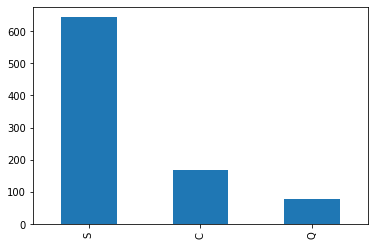

In [ ]:
df['Embarked'].value_counts().plot(kind ="bar")
print(df['Embarked'].value_counts())

**Interpretaion bold text- From the above chart, we can understand that more number of passengers were embarked from Southampton and the Queenstown had the least number of passengers embarked**


# 2. Outlier detection

### a. Perform outlier detection on the "Age" variable using the z-score method, modified z-score method, and interquartile range (IQR) method. (Consider 3 as threshold for z-score and modified z-score methods)

In [ ]:
##setting Age feature and threshold value as given
feature='Age'
threshold=3

In [ ]:
##Outlier detection using z-score
def findOutlierZscore(col, threshold):
    mean = df[col].mean() ## calculating mean of the df column
    print('mean :', mean)
    std = np.std(df[col]) ## calculating standard deviation of the column
    print('std :', std)
    z = ((df[col]) - mean) / std ## z score calculated by the formula z = (x - mean)/standard deviation
    df['z']=z ##saving the z score to dataframe
    return df[df['z'] > threshold] ##returning the outliers beyond the threshold


In [ ]:
##invoking the outlier function
print('Outliers using Z-Score')
print('----------------------')
findOutlierZscore(feature, threshold)

Outliers using Z-Score
----------------------
mean : 29.69911764705882
std : 14.516321150817316


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S,3.465126
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S,3.051798


In [ ]:
## Detecting outliers using modified z-score
##𝒎𝒐𝒅𝒊𝒇𝒊𝒆𝒅 z-𝒔𝒄𝒐𝒓𝒆 = (𝟎.𝟔𝟕𝟒𝟓 (𝒙−𝒎𝒆𝒅𝒊𝒂𝒏))/MAD
#𝑴𝑨𝑫 – Median Absolute Deviation, MAD = 𝑚𝑒𝑑𝑖𝑎𝑛 (|𝑥 − 𝑚𝑒𝑑𝑖𝑎𝑛|)

##Outlier detection using modified z-score
def findOutliermodifiedZscore(col, threshold):
    median = (df[col]).median() ##finding median of the feature
    print('median :',median)
    mad = (np.abs(df[col] - median)).median() ##calculating mad as per 𝑴𝑨𝑫 – Median Absolute Deviation, MAD = 𝑚𝑒𝑑𝑖𝑎𝑛 (|𝑥 − 𝑚𝑒𝑑𝑖𝑎𝑛|)
    print('mad :', mad)
    mod_z = (0.6745 * (df[col] - median)) / mad ## calculating modified z-score as per 𝒎𝒐𝒅𝒊𝒇𝒊𝒆𝒅 z-𝒔𝒄𝒐𝒓𝒆 = (𝟎.𝟔𝟕𝟒𝟓 (𝒙−𝒎𝒆𝒅𝒊𝒂𝒏))/MAD
    df['mod_z']=mod_z ##adding a new column for modified z score
    return df[df['mod_z'] > threshold] ## returning the outliers

In [ ]:
##invoking the outlier function
print('Outliers using modified Z-Score')
print('-------------------------------')
findOutliermodifiedZscore(feature, threshold)

Outliers using modified Z-Score
-------------------------------
median : 28.0
mad : 9.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z,mod_z
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,2.845134,3.222611
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,2.810690,3.185139
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,2.845134,3.222611
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,3.465126,3.897111
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,2.776246,3.147667
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,2.776246,3.147667
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,3.051798,3.447444


In [ ]:
df.shape

(891, 14)

In [ ]:
## Detecting outliers using IQR
# (IQR):Q3-Q1
#Outliers - [𝑄1−1.5∗𝐼𝑄𝑅,𝑄1−1.5∗𝐼𝑄𝑅]

def findOutlierIQR(df, col):
  sorted_df = sorted(df[col].dropna()) ##sorting the array of the feature column

  ##finding the 1st quartile value by multiplying the length by .25 and minus 1 to match the index
  q1=sorted_df[(int((len(sorted_df) * 0.25))) - 1]
  ##finding the 3rd quartile value by multiplying the length by .75 and minus 1 to match the index
  q3=sorted_df[(int((len(sorted_df) * 0.75))) - 1]

  iqr=q3-q1   ##iqr = q3-q1

  ##finding upper and lower limit using the formula
  upper_limit = (q3 + 1.5 * iqr)
  lower_limit = (q1 - 1.5 * iqr)

  print('Q1 :', q1)
  print('Q3 :', q3)
  print('IQR :', iqr)
  print('Lower Limit :', lower_limit)
  print('Upper Limit :', upper_limit)

  ##using the outliers formula with iqr
  outliers = df[df[col] > upper_limit]
  outliers.append(df[df[col] < lower_limit])
  return outliers



In [ ]:
##invoking the outlier function
print('Outliers using IQR')
print('------------------')
outliers = findOutlierIQR(df, feature)
outliers


Outliers using IQR
------------------
Q1 : 20.0
Q3 : 38.0
IQR : 18.0
Lower Limit : -7.0
Upper Limit : 65.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z,mod_z
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,2.500694,2.847889
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,2.845134,3.222611
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,2.810690,3.185139
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,2.845134,3.222611
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,3.465126,3.897111
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,2.776246,3.147667
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,2.776246,3.147667
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,3.051798,3.447444


In [ ]:
outliers.shape

(8, 14)

### b. Based on the IQR method, drop the observations that are identified as outliers and save the cleaned data in a new dataframe.

In [ ]:
##dropping the outliers data from the main dataframe to create a clean dataset
cleaned_df=df.drop(outliers.index)
cleaned_df.shape ## shape of cleaned dataset shows the decreased count

(883, 14)

### C. Plot a histogram of the "Age" variable in the cleaned data and interpret the distribution of the data. (Use number of bins = 10)

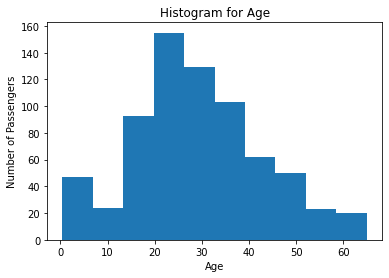

In [ ]:
# histogram plotting for Age
cleaned_df['Age'].plot(kind= 'hist', bins=10)
plt.title("Histogram for Age")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

The histogram shows the distribution of age of the passengers with respect to number of passengers. The histogram tells us that most of the passengers were between 20 and 35 years old and kids less than 10 years of age were more than old people beyond 50 years of age.

### D. The "Age" variable has missing values. Based on your understanding of the distribution of the "Age" variable from step 3, perform an appropriate missing value imputation technique to fill in the missing values. You can choose from methods such as mean imputation and median imputation. Justify your choice of imputation technique.

**Answer - Since the age histogram is slightly right skewed, it is advisable to impute the missing values using median as it is not influenced by the skew whereas mean is sensitive to the skews and outliers.**

In [ ]:
cleaned_df[feature].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 883, dtype: bool

In [ ]:
## imputing the missing values of age by median
cleaned_df[feature].fillna(value=cleaned_df[feature].median(), inplace=True)
cleaned_df[feature].isna() ##isna showing the imputed records

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 883, dtype: bool

# 3. box plot

### a. Create a boxplot to compare the variable "Fare" distribution between survivors and non- survivors in the titanic dataset.

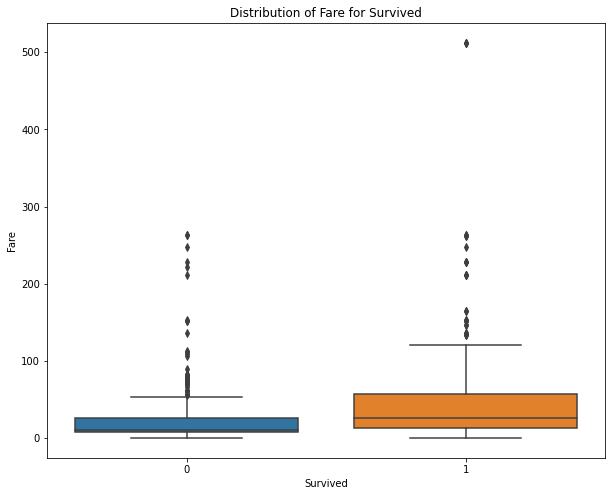

In [ ]:
#Plot two boxplots to compare dispersion
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=cleaned_df,x='Survived', y='Fare', ax=ax)
plt.title("Distribution of Fare for Survived")
plt.show()

### b. Use the boxplot to identify any differences in the median, dispersion, skewness and outliers between the two groups. Draw a conclusion based on your analysis.

**Difference Analysis:**
1. The median fare of the survivors is greater than those of not survived.
2. The fare distribution of the survivors vary upto those of upper bound, which states that survivors distribution has the largest maximum value.
3. Among both, the non survivors distribution has the lowest q1 value.
4. There are more outliers in non survivors fare than survivors, however, most of the outlier fare values are similar in both categories excpet for 1 extreme value in survivor.

**Conclusion:**
The figures show that the average number of passengers with high fare tickets had survived more when compared to non survivors.

# 4. Correlation Coefficient

### a. Compute the correlation coefficient between the "Age" and "SibSp" variables in the titanic dataset.

In [ ]:
##calculating correlation coefficient for age and sibsp
## formula - sum ( (x - mean(x))/std(x) * (y - mean(y))/std(y)) / n-1
x_std = np.std(cleaned_df['Age']) ##standard deviation of Age feature
y_std = np.std(cleaned_df['SibSp']) ##standard deviation of SibSp feature

x = (cleaned_df['Age'] - cleaned_df['Age'].mean()) / x_std ## numerator of the correlation coefficient formula
y = (cleaned_df['SibSp'] - cleaned_df['SibSp'].mean()) / y_std ##denominator of the correlation coefficient formula

r = (x * y).sum() / (len(cleaned_df)-1) ## r - correlation coefficient as per the given formula
print('correlation coefficient = ', r)


correlation coefficient =  -0.2345882787035562


### b. Use a scatter plot to visually inspect the relationship between the two variables and interpret the strength and direction of the relationship based on the computed correlation coefficient.

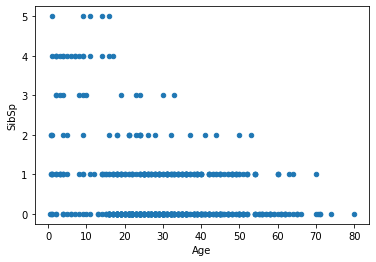

In [ ]:
df.plot.scatter(x = 'Age', y = 'SibSp');

The scatter plot between the age and sibling/spouse shows the relationship between them is **weak** as the correlation coefficient is **-0.234** which is less than **0.3**. The negative sign of the correlation coefficient also indicates the **negative association** between them which is also evident through the scatterplot.